# Problem Statement

Financial institutions face the constant challenge of detecting fraudulent transactions amidst legitimate ones. Early identification and prevention of such fraudulent activities are crucial for minimizing financial losses and protecting customer trust. The objective is to develop a mathematical model to identify risky transactions using the available features of the 'Financial Transactions' dataset.

# 1. Import Libraries/Dataset
    1. Download the dataset
    2. Import the required libraries
    
# Dataset: FinancialTransactions dataset can be downloaded from drive
    https://drive.google.com/file/d/1-Rtizhn5EaLei3N3TOvqg4F74PTxtrjc/view?usp=sharing

In [1]:
import numpy as np
#numpy: Provides support for arrays, matrices, and high-level mathematical functions.

import pandas as pd
#pandas: Essential for data manipulation and analysis, particularly useful for working with structured data.

import matplotlib.pyplot as plt
import seaborn as sns
#matplotlib.pyplot & seaborn: Used for data visualization; seaborn is built on matplotlib and provides a high-level interface for drawing attractive and informative statistical graphics.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#sklearn: Short for scikit-learn, it offers simple and efficient tools for data mining and data analysis, including preprocessing, cross-validation, and various classification, regression, and clustering algorithms.

#import xgboost as xgb
#xgboost: Stands for Extreme Gradient Boosting; it's an implementation of gradient boosted decision trees designed for speed and performance

In [2]:
df = pd.read_csv('Assignment 1 Set 1 Dataset.csv')


In [3]:
df.shape

(1000, 20)

# 2. Data Visualization and Exploration

# a.
Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [4]:
print(df.head(2))

   Unnamed: 0      Amount        Date Card Type MCC Category Location  \
0           0  180.924993  2023-07-02     Debit  Electronics       UK   
1           1  794.625797  2023-02-18   Prepaid    Groceries   Canada   

    Device  Previous Transactions  Balance Before Transaction  Time of Day  \
0  Desktop                      6                  919.055267           10   
1  Desktop                      5                 3529.930762           17   

   Velocity  Customer Age  Customer Income    Card Limit  Credit Score  \
0 -0.337955            52    105545.340543   2503.758986           401   
1  0.015117            62     92651.854405  12885.681726           409   

  Merchant Reputation  Merchant Location History  Spending Patterns  \
0             Average                          6         828.820298   
1             Average                         13        4384.528307   

  Online Transactions Frequency  Is Fraudulent  
0                        Medium              0  
1         

In [5]:
#df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1000 non-null   int64  
 1   Amount                         1000 non-null   float64
 2   Date                           1000 non-null   object 
 3   Card Type                      1000 non-null   object 
 4   MCC Category                   1000 non-null   object 
 5   Location                       1000 non-null   object 
 6   Device                         1000 non-null   object 
 7   Previous Transactions          1000 non-null   int64  
 8   Balance Before Transaction     1000 non-null   float64
 9   Time of Day                    1000 non-null   int64  
 10  Velocity                       1000 non-null   float64
 11  Customer Age                   1000 non-null   int64  
 12  Customer Income                1000 non-null   fl

# b.
Comment on class imbalance with appropriate visualization method.

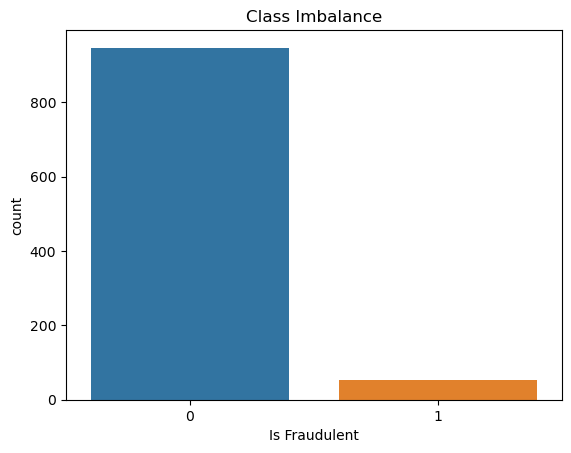

In [6]:
sns.countplot(x='Is Fraudulent', data=df)
plt.title('Class Imbalance')
plt.show()


# c.
    Provide appropriate data visualizations to get an insight about the dataset.

###    Histograms for distribution of numerical features:

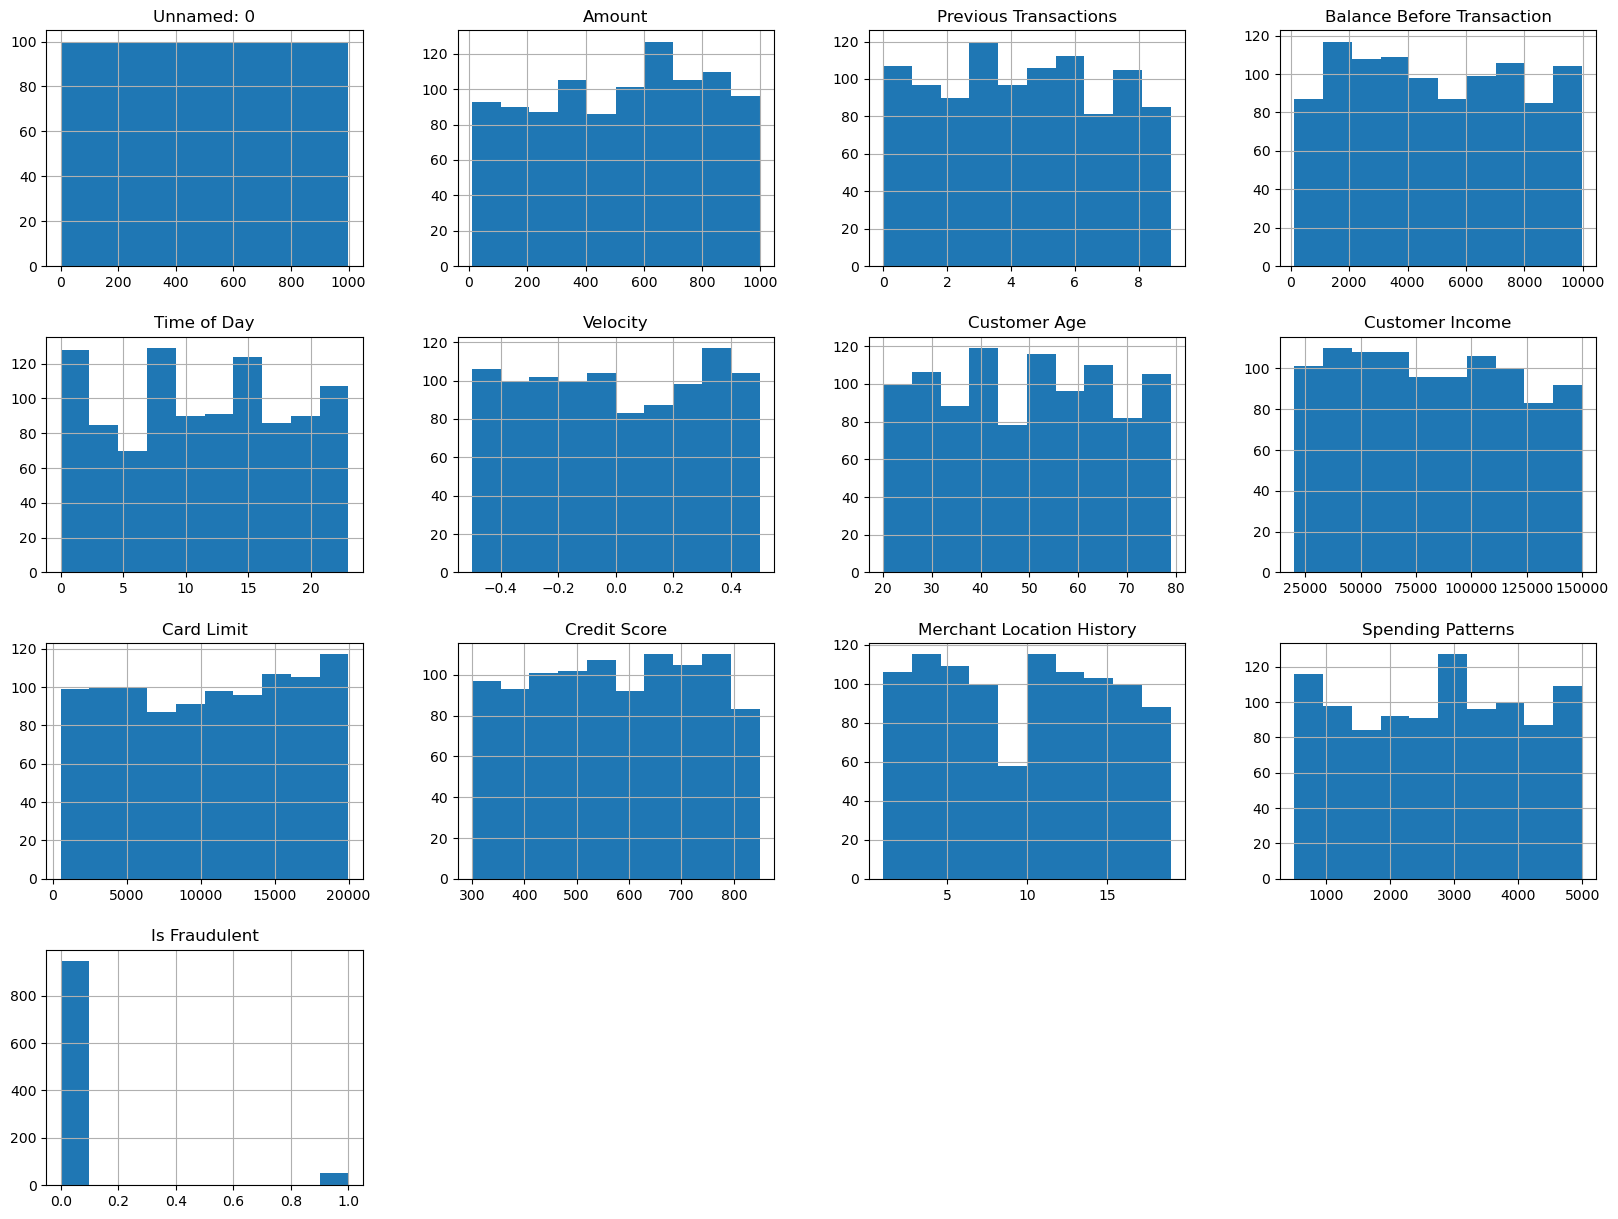

In [7]:
df.hist(figsize=(20, 15))
plt.show()


###    Box plots to check for outliers:

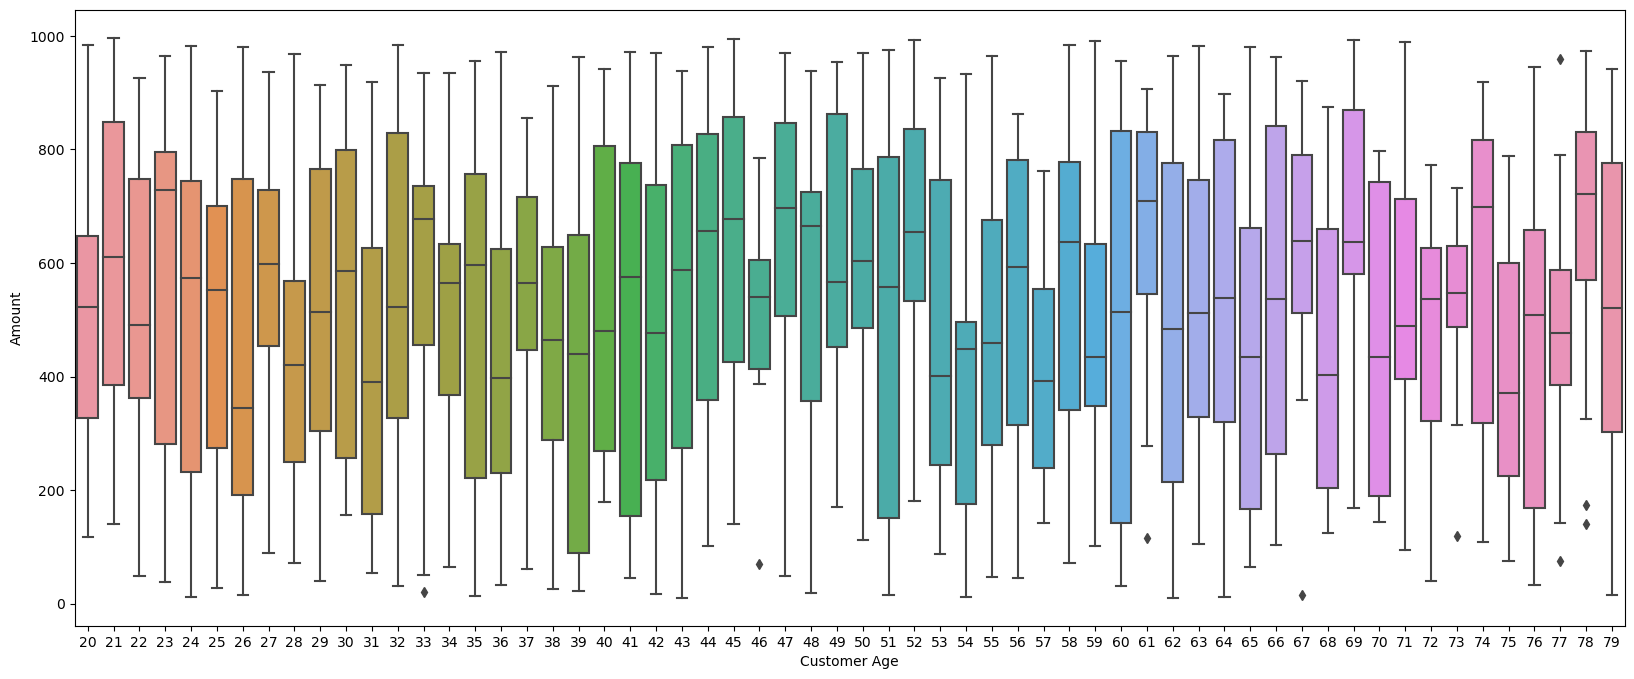

In [8]:
# Create a figure and axis object with a larger size
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the boxplot
sns.boxplot(data=df, x='Customer Age', y='Amount', ax=ax)

# Show the plot
plt.show()


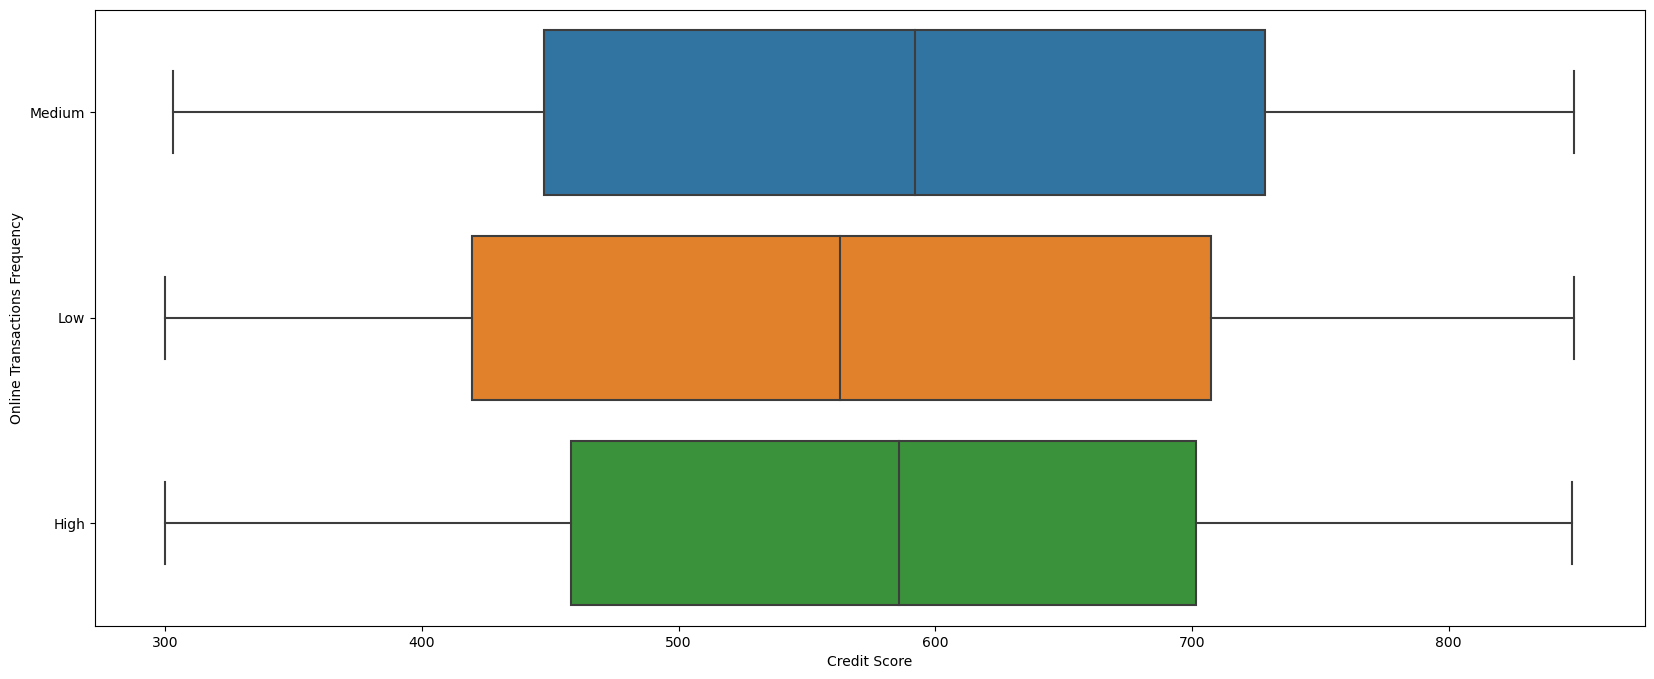

In [9]:
# Create a figure and axis object with a larger size
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the boxplot
sns.boxplot(data=df, x='Credit Score', y='Online Transactions Frequency', ax=ax)

# Show the plot
plt.show()

# Pair plots
    to visualize relationships between pairs of features (useful for a small subset of features):

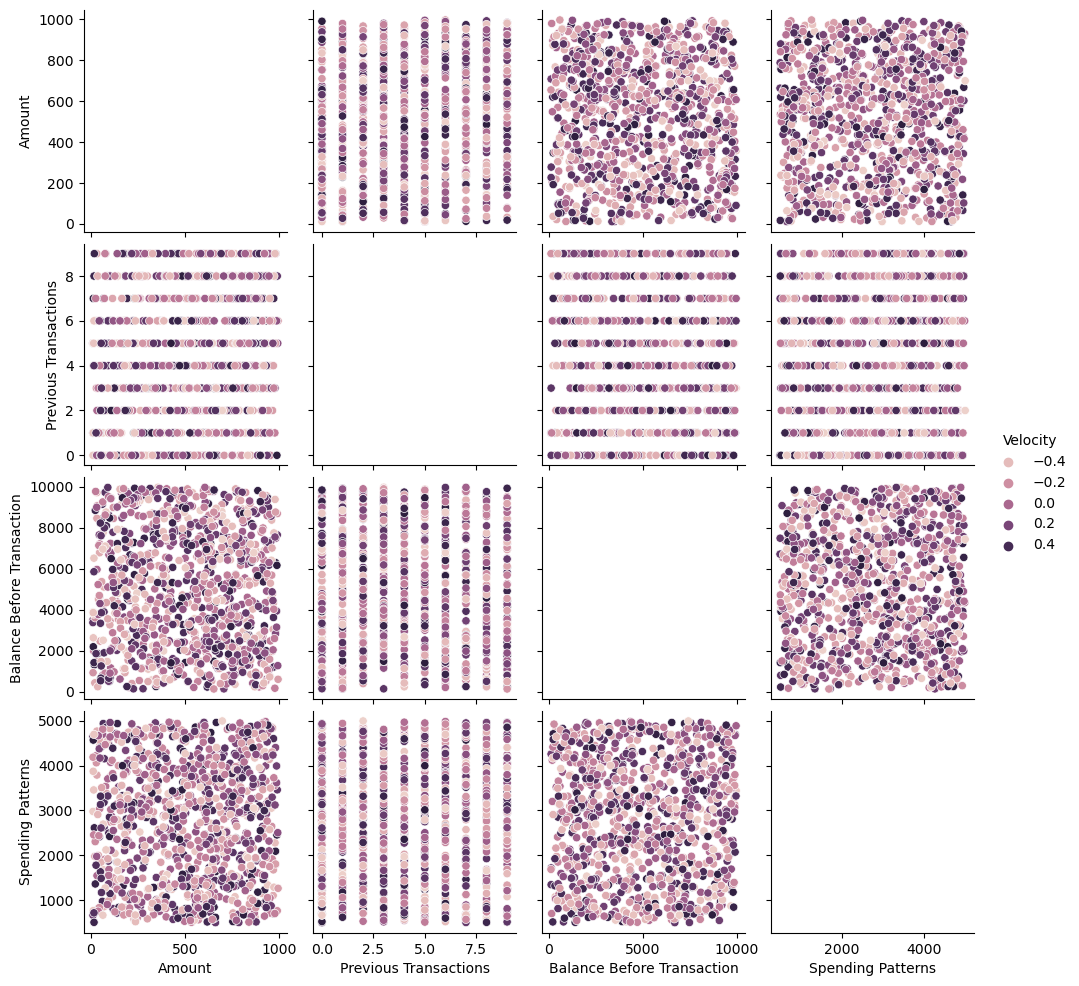

In [10]:
#sns.pairplot(data=df, vars=['Amount', 'Previous Transactions', 'Balance Before Transaction'], hue='Time of Day')
#sns.pairplot(data=df, vars=['Amount', 'Previous Transactions', 'Balance Before Transaction'], hue='Velocity')
sns.pairplot(data=df, vars=['Amount', 'Previous Transactions', 'Balance Before Transaction','Spending Patterns'], hue='Velocity')
plt.show()


# d.
Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have effect on feature selection that you will perform in the next step? Justify your answer.

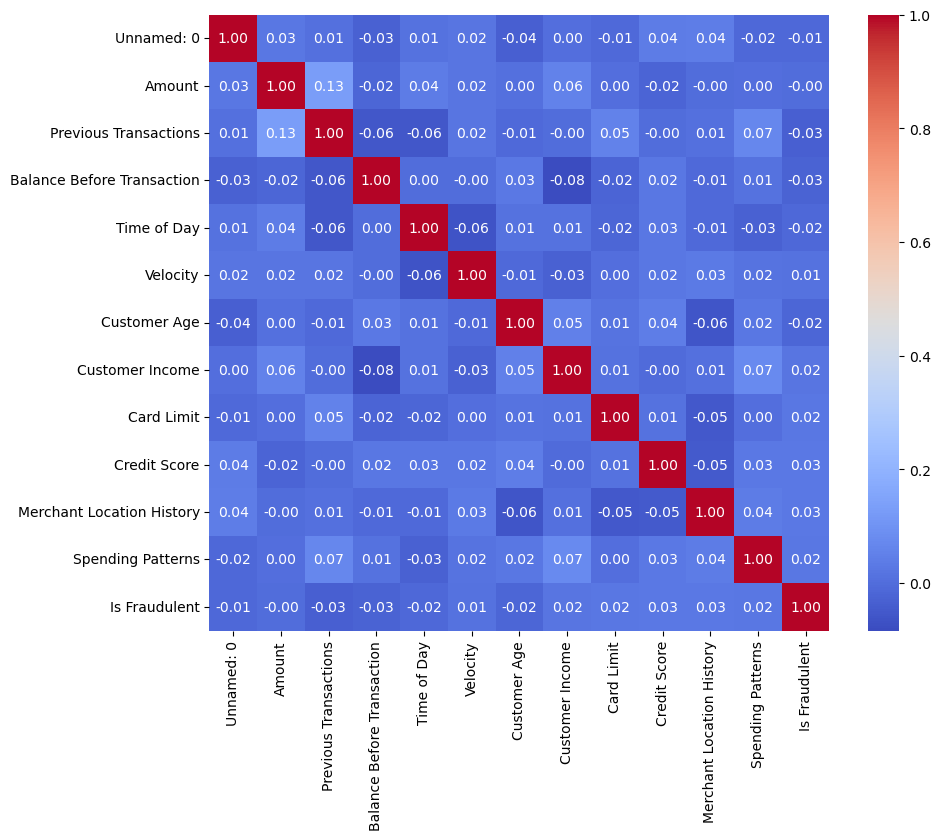

In [11]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()


### Effect on Feature Selection:
    •	High correlation between two features suggests that they carry similar information, which may lead to multicollinearity in models like linear regression.
    •	Features highly correlated with the target variable are good predictors and should be considered for model training.
    •	On the contrary, features with very low correlation with the target might not be useful and could be candidates for removal to simplify the model.
        However, correlation does not imply causation, and some models, especially tree-based models like Random Forests and Gradient Boosting, can handle correlated features well. So, while correlational analysis is a valuable tool for feature selection, the decision should also consider the chosen model's characteristics and domain knowledge.

    

3. Data Pre-processing and cleaning [2 M]
a.
Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore few latest data balancing tasks and its effect on model evaluation parameters.
b.
Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset. Provide proper justification. Techniques used without justification will not be awarded marks. Explore a few techniques for identifying feature importance for your feature engineering task.

a. Pre-processing Steps:
        - 1.	Identifying NULL or Missing Values:
        - 2.    Handling Missing Values:
        - 3.    Handling of Outliers: 
                    •	Detection: 
                    •	Treatment: 
        - 4.    Handling Skewed Data: 
        - 5.    Data Balancing: 
          

In [22]:
# 1. Identifying NULL or Missing Values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Unnamed: 0                       0
Amount                           0
Date                             0
Card Type                        0
MCC Category                     0
Location                         0
Device                           0
Previous Transactions            0
Balance Before Transaction       0
Time of Day                      0
Velocity                         0
Customer Age                     0
Customer Income                  0
Card Limit                       0
Credit Score                     0
Merchant Reputation              0
Merchant Location History        0
Spending Patterns                0
Online Transactions Frequency    0
Is Fraudulent                    0
dtype: int64


In [38]:
# Fill missing values for numerical variables with mean
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    df[feature] = df[feature].fillna(df[feature].mean())

# Replace missing values in categorical columns with 'Unknown'
categorical_features = ['Date', 'Card Type', 'MCC Category', 'Location', 'Device', 'Merchant Reputation', 'Online Transactions Frequency']
for feature in categorical_features:
    df[feature] = df[feature].fillna('Unknown')




In [36]:
print(df.columns)


Index(['Unnamed: 0', 'Amount', 'Date', 'Card Type', 'MCC Category', 'Location',
       'Device', 'Previous Transactions', 'Balance Before Transaction',
       'Time of Day', 'Velocity', 'Customer Age', 'Customer Income',
       'Card Limit', 'Credit Score', 'Merchant Reputation',
       'Merchant Location History', 'Spending Patterns',
       'Online Transactions Frequency', 'Is Fraudulent'],
      dtype='object')


b. 1.Feature Transformation:
    Standardization (Z-score normalization): Use when you want features to have the properties of a standard normal 
    distribution with μ = 0 and σ = 1.


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['feature1', 'feature2']])
